In [2]:
# Step 1: Import Required Libraries

# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Financial Data
import yfinance as yf

# Machine Learning Models and Evaluation
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Aesthetic setup for plots
sns.set(style='whitegrid')


In [4]:
from datetime import datetime

# User input for stock symbol and time period
stock_symbol = input("Enter the stock symbol (e.g., AAPL, TSLA, INFY.NS): ")
start_date = "2020-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')

# Download stock data
df = yf.download(stock_symbol, start=start_date, end=end_date)

# Show top rows
df.head()


Enter the stock symbol (e.g., AAPL, TSLA, INFY.NS): aapl


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2020-01-02,72.716064,72.776591,71.466805,71.721011,135480400
2020-01-03,72.009117,72.771745,71.783962,71.941328,146322800
2020-01-06,72.582901,72.621639,70.876068,71.127858,118387200
2020-01-07,72.241562,72.849239,72.021246,72.592609,108872000
2020-01-08,73.403641,73.706271,71.943751,71.943751,132079200


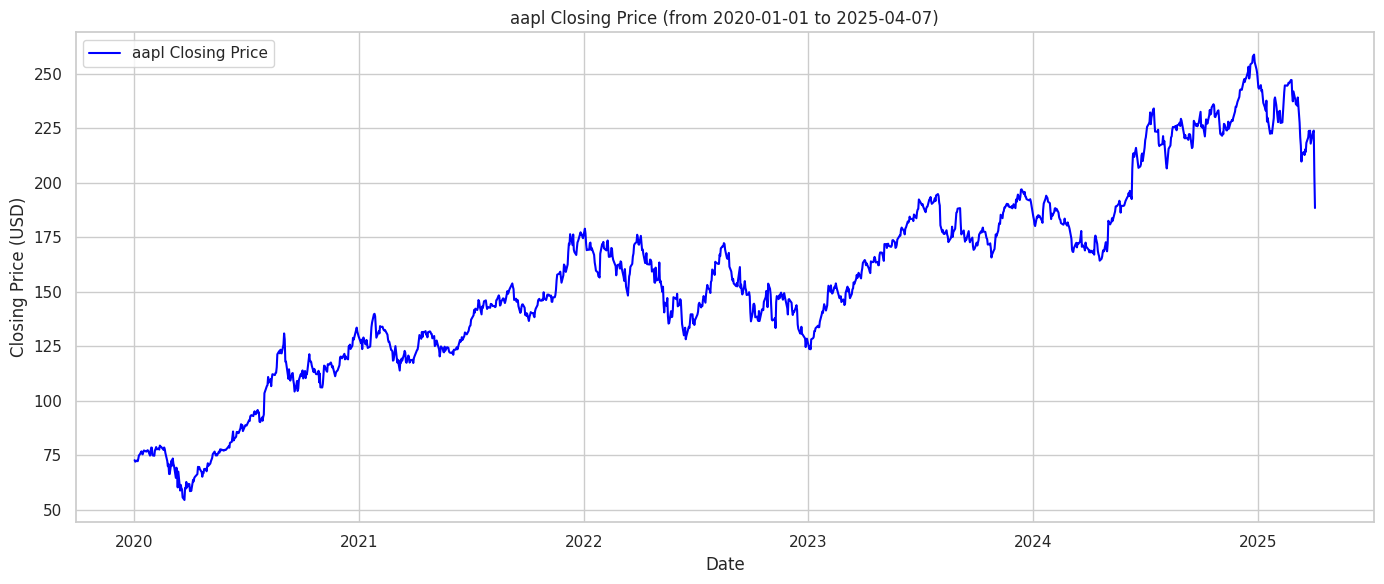

In [5]:
# Step 2: Plot Closing Price over Time
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label=f'{stock_symbol} Closing Price', color='blue')
plt.title(f'{stock_symbol} Closing Price (from {start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()


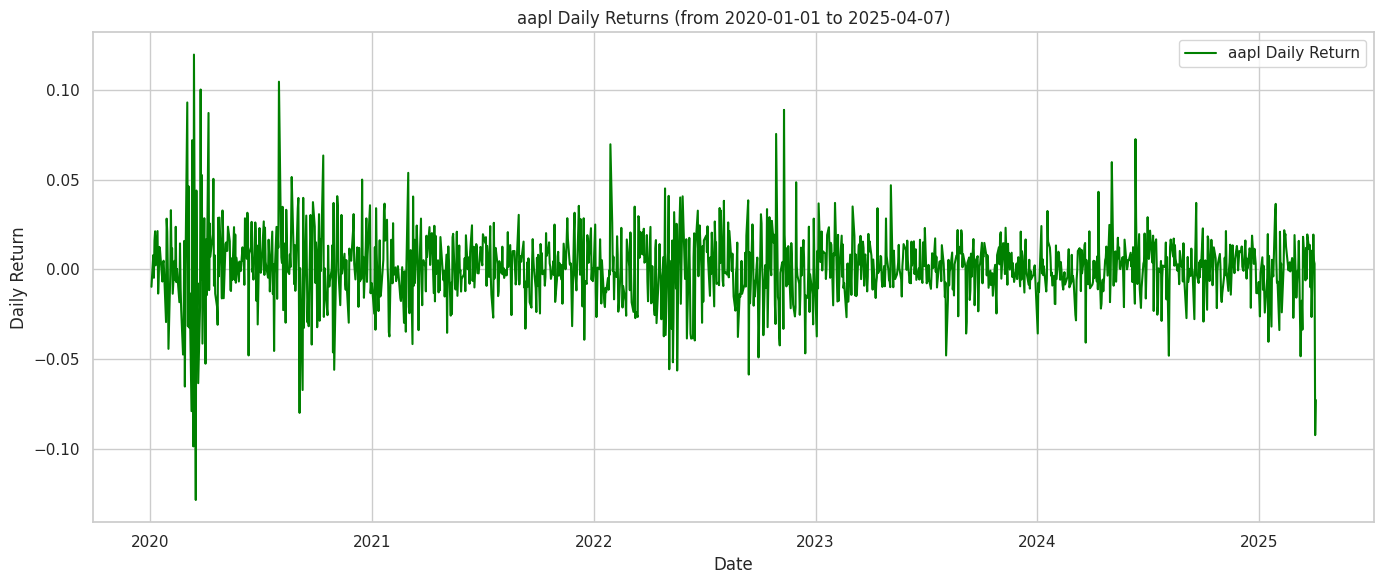

In [6]:
# Step 3: Calculate Daily Returns
df['Daily Return'] = df['Close'].pct_change()

# Plot the Daily Returns
plt.figure(figsize=(14, 6))
plt.plot(df['Daily Return'], label=f'{stock_symbol} Daily Return', color='green')
plt.title(f'{stock_symbol} Daily Returns (from {start_date} to {end_date})')
plt.xlabel('Date')
plt.ylabel('Daily Return')
plt.legend()
plt.tight_layout()
plt.show()


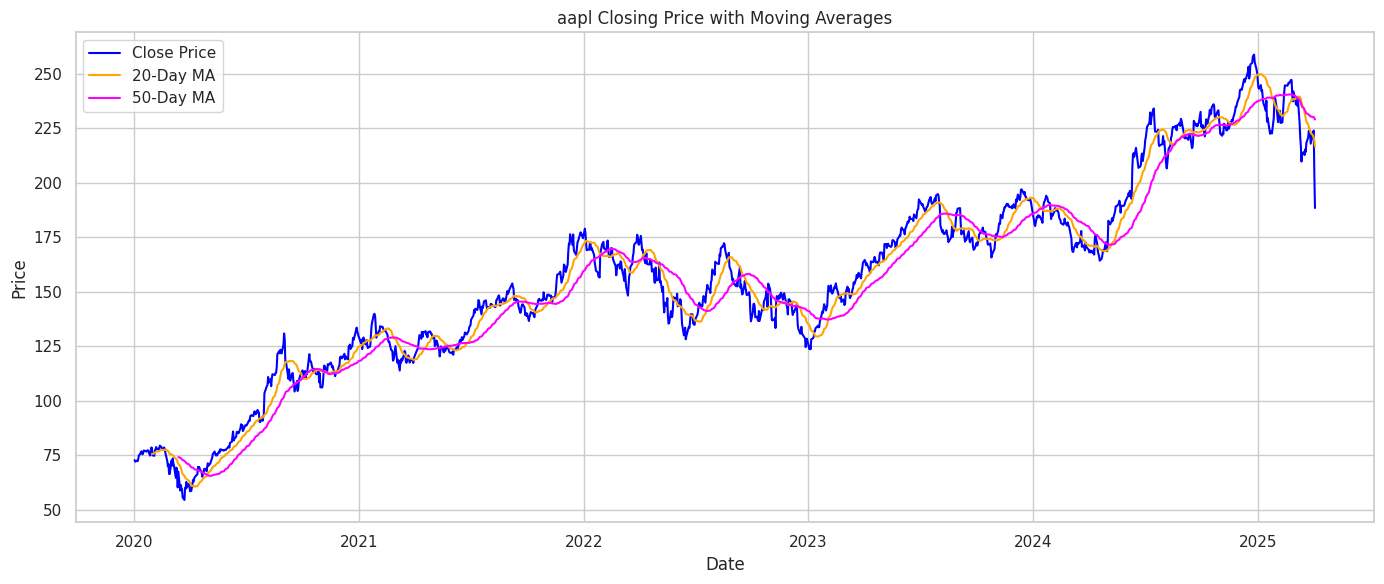

In [7]:
# Step 4: Calculate Moving Averages
df['MA20'] = df['Close'].rolling(window=20).mean()  # 20-day moving average
df['MA50'] = df['Close'].rolling(window=50).mean()  # 50-day moving average

# Plot the stock close price with moving averages
plt.figure(figsize=(14, 6))
plt.plot(df['Close'], label='Close Price', color='blue')
plt.plot(df['MA20'], label='20-Day MA', color='orange')
plt.plot(df['MA50'], label='50-Day MA', color='magenta')
plt.title(f'{stock_symbol} Closing Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [8]:
# Calculate rolling volatility (standard deviation of daily returns)
df['Volatility'] = df['Daily Return'].rolling(window=5).std()

# Create a lag feature (previous day's closing price)
df['Lag_1'] = df['Close'].shift(1)

# Drop any NaN values resulting from rolling and shifting
df.dropna(inplace=True)

# Display the updated DataFrame
df.head()


Price,Close,High,Low,Open,Volume,Daily Return,MA20,MA50,Volatility,Lag_1
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,,,,,
Date,,,,,,,,,,
2020-03-13,67.457481,67.930708,61.385652,64.283243,370732000,0.119808,71.016014,74.122979,0.095746,60.240211
2020-03-16,58.779285,62.873275,58.242963,58.716187,322423600,-0.128647,70.012050,73.844244,0.107310,67.457481
2020-03-17,61.363811,62.516533,57.854672,60.065477,324056000,0.043970,69.209509,73.631337,0.102300,58.779285
2020-03-18,59.861633,60.669755,57.544048,58.187150,300233600,-0.024480,68.275801,73.376912,0.102025,61.363811
2020-03-19,59.402981,61.358973,58.876368,60.036373,271857200,-0.007662,67.359445,73.120140,0.091506,59.861633


In [9]:
# Define features and target variable
features = ['Lag_1', 'MA20', 'MA50', 'Volatility']
target = 'Close'

X = df[features]
y = df[target]

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

# Decision Tree Regressor
dt = DecisionTreeRegressor(max_depth=5, random_state=0)
dt.fit(X_train, y_train)
dt_preds = dt.predict(X_test)

# Evaluate
print("Linear Regression R2 Score:", r2_score(y_test, lr_preds))
print("Decision Tree R2 Score:", r2_score(y_test, dt_preds))


Linear Regression R2 Score: 0.972942627959527
Decision Tree R2 Score: -1.1515609981135717


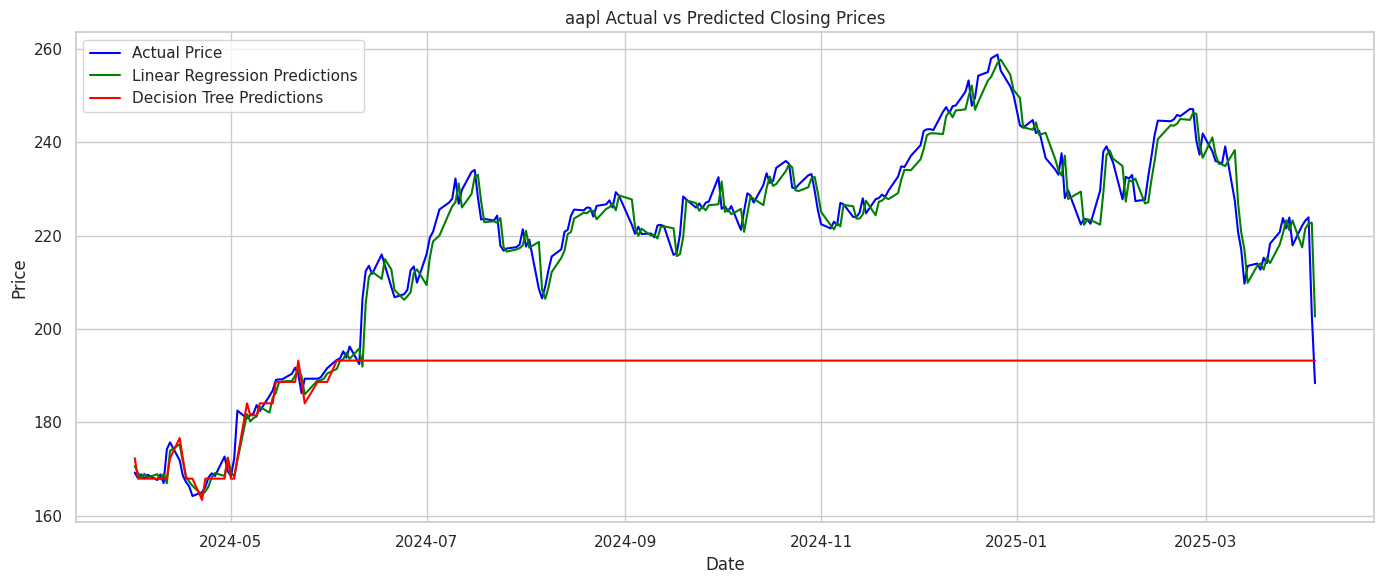

In [11]:
plt.figure(figsize=(14, 6))
plt.plot(y_test.index, y_test, label='Actual Price', color='blue')
plt.plot(y_test.index, lr_preds, label='Linear Regression Predictions', color='green')
plt.plot(y_test.index, dt_preds, label='Decision Tree Predictions', color='red')
plt.title(f'{stock_symbol} Actual vs Predicted Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.tight_layout()
plt.show()


In [12]:
from sklearn.metrics import mean_squared_error

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))

comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree'],
    'R2 Score': [r2_score(y_test, lr_preds), r2_score(y_test, dt_preds)],
    'RMSE': [lr_rmse, dt_rmse]
})

print(comparison)


               Model  R2 Score       RMSE
0  Linear Regression  0.972943   3.711673
1      Decision Tree -1.151561  33.098149


In [13]:
# Use the last row of df to make next-day prediction
latest_features = df[features].iloc[-1:].values

print("Next Day Prediction:")
print("Linear Regression:", lr.predict(latest_features)[0])
print("Decision Tree:", dt.predict(latest_features)[0])


Next Day Prediction:
Linear Regression: [202.65614141]
Decision Tree: 193.2238337198893


In [14]:
import joblib

joblib.dump(lr, 'linear_model.pkl')
joblib.dump(dt, 'decision_tree_model.pkl')


['decision_tree_model.pkl']